#### Q1: Draw a curve on the whiteboard, say a quadratic or a cubic. Take a picture of this curve using your phone. Crop the image such that the bottom left corner shall be assumed as the origin of the plane on which the curve resides. Resize the image to 300x200 pixels. Now. process the image as a matrix (300x200) and convert the image to a table with the coordinates of every pixel that forms the curve. Plot the table using Matplotlib and try to make the plot as close as possible to the original image.

 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

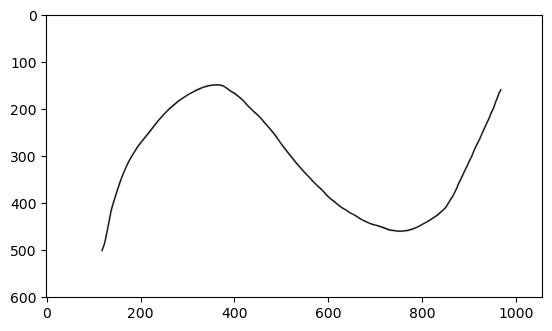

In [2]:
img = cv2.imread("C:/Users/Keerthi/Pictures/Screenshots/Screenshot (1).png", cv2.IMREAD_COLOR)
#plt.imshow((cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.imshow(img)

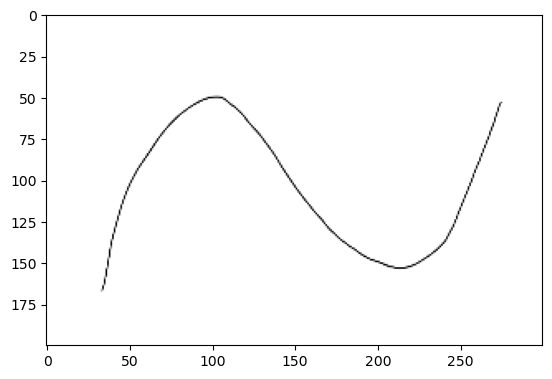

In [3]:
img = cv2.resize(img, [300,200])
plt.imshow(img)

In [4]:
x=[]
y=[]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
yx_coords = np.column_stack(np.where(gray_img != 255))
print(yx_coords)


[[ 49 100]
 [ 49 101]
 [ 49 102]
 ...
 [166  34]
 [167  33]
 [167  34]]


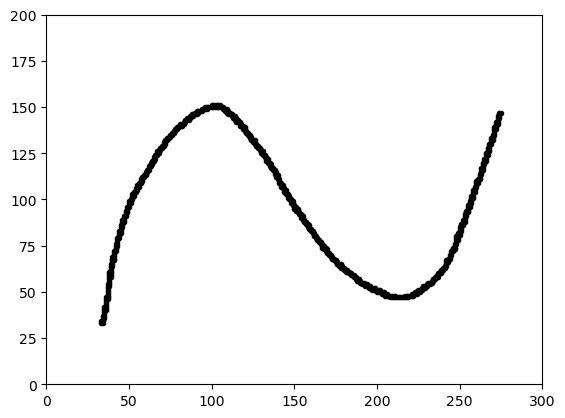

In [5]:
for i in yx_coords:
    x.append(i[1]);y.append(200-i[0])
for i in range(len(x)):
    plt.xlim(0,300)
    plt.ylim(0,200)
    plt.plot(x[i],y[i],'.',color='black')
plt.show()

#### Q2:Given a 3x3 matrix (A), find the projection matrix (P) such that A*P = A^T.

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
A_inv = np.linalg.inv(A)
proj_matrix_transpose = np.dot(A.T, A_inv)  
print(np.dot(proj_matrix_transpose,A))
print(A.T)

[[ 1.  4.  7.]
 [ 2.  5.  8.]
 [ 3.  6. 10.]]
[[ 1  4  7]
 [ 2  5  8]
 [ 3  6 10]]


#### Q2b:Also, find the projection matrix (P) such that A*P = rotation(A, 90deg)

In [7]:
A_rotated_counterclockwise = np.rot90(A, k=1, axes=(0,1))
print(A)
print(A_rotated_counterclockwise)
proj_matrix_rot90 = A_rotated_counterclockwise@A_inv
print(proj_matrix_rot90)
print(proj_matrix_rot90@A)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
[[ 3  6 10]
 [ 2  5  8]
 [ 1  4  7]]
[[ 4.00000000e+00 -2.00000000e+00  1.00000000e+00]
 [ 3.33333333e+00 -3.33333333e-01 -8.88178420e-16]
 [ 3.66666667e+00 -6.66666667e-01 -5.55111512e-16]]
[[ 3.  6. 10.]
 [ 2.  5.  8.]
 [ 1.  4.  7.]]


#### 3.Consider a basket of mixed flowers. Represent these flowers in a suitable feature space. Consider an example basket of 20 mixed flowers. Create the matrix representation of these flowers in the chosen feature space. Note: ensure the features are encoded to become numeral or Boolean when constructing the matrix.

In [18]:
flowers_df=pd.DataFrame({
    'Flower Name' : ['Rose','Jasmine','Marigold','Lily','Daisy','Lotus','Orchid','Iris','Sunflower','Lavender','Honeysuckle', 'Clematis', 'Delphinium', 'Rhododendron', 'Cosmos',
'Zinnia', 'Pansy', 'Crocus', 'Anemone', 'Hydrangea'],
    'Fragrance' : ['yes','yes','yes','yes','yes','yes','no','no','yes','yes','yes','no','no','no','no','no','no','no','no','no'],
    'petal count':[6, 4, 1, 4, 4, 4, 7, 3, 2, 8, 5, 2, 1, 2, 3, 4, 4, 5, 3, 4],
    'sepal': ['yes','yes','yes','yes','yes','yes','no','no','yes','yes','yes','no','no','no','no','no','no','no','no','no'],
    'petal width(in cm)': [4, 5, 5, 4, 6, 7, 4, 5, 5, 4, 6, 7,4, 5, 5, 4, 6, 7, 9, 2]
})
flowers_df

,Flower Name,Fragrance,petal count,sepal,petal width(in cm)
0,Rose,yes,6,yes,4
1,Jasmine,yes,4,yes,5
2,Marigold,yes,1,yes,5
3,Lily,yes,4,yes,4
4,Daisy,yes,4,yes,6
5,Lotus,yes,4,yes,7
6,Orchid,no,7,no,4
7,Iris,no,3,no,5
8,Sunflower,yes,2,yes,5
9,Lavender,yes,8,yes,4


#### Q4:: Consider a collection of text documents (say 'N' of them). Truncate these texts to a fixed length 'M' of your choice. Every word in the text can now be encoded as a one-hot vector with a dimensionality of 'V' (unique word count). Construct a matrix of the order NxMxV that represents the text collection in the vector space.

In [73]:
import os
import glob
import sys

folder_path = "C:/Users/keerthivasan.s/Documents/TextFiles"
folder_path += "" if folder_path[-1]=="/" else "/"

txt_files = glob.glob(folder_path+"*.txt")
N=5; M=15
unique_words = np.array([])
files_size_M = []
for file_path in txt_files:
    file = open(file_path, 'r', encoding='utf-8')
    file_M = file.read().split()[:15]
    files_size_M.append(file_M)
    for i in file_M:
        if i not in unique_words:
            unique_words = np.append(unique_words, i)
V=np.size(unique_words)
print(N,M,V)
result = np.empty((N,M,V))
char_to_int = dict((c, i) for i, c in enumerate(unique_words))
c=0
for file in files_size_M:
    one_hot_word = np.zeros((15, len(unique_words)))
    for k in range(15):
        one_hot_word[k, char_to_int[file[k]]] = 1
        result[c] = one_hot_word
    c+=1
np.set_printoptions(threshold=sys.maxsize)
print(result)

5 15 65
[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0